Nama : Ketut Satria Wibisana

Kelas : TK-45-G09

NIM : 1103213148

# **Praktikum 1: Ekstraksi Garis dengan Hough Transform**

Tujuan: Mempelajari cara mendeteksi garis dari gambar menggunakan Hough Transform.

Saving GAMBAR 1.jpg to GAMBAR 1.jpg


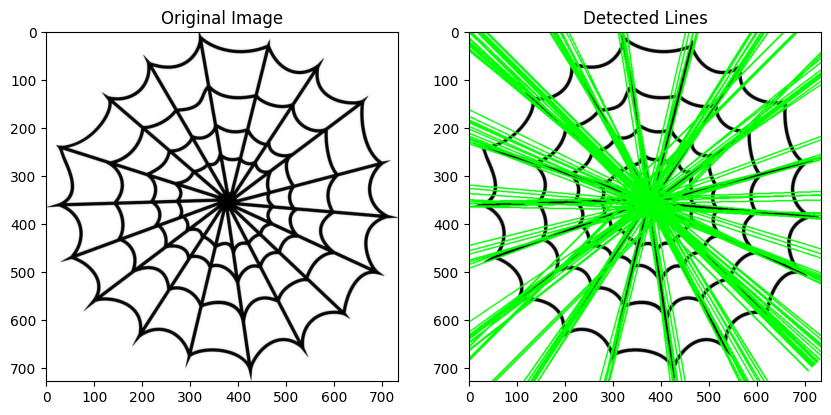

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, 50, 150)

# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

# Gambar garis pada gambar asli
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Lines")
plt.show()

Hasil Analisis Output:

Deteksi garis menggunakan algoritma Hough Transform berhasil mengidentifikasi garis-garis diagonal pada gambar asli. Pada gambar hasil (kanan), terlihat garis-garis hijau yang merepresentasikan posisi serta orientasi garis yang terdeteksi, yang sebagian besar sesuai dengan pola garis hitam pada gambar asli (kiri). Proses ini diawali dengan deteksi tepi menggunakan algoritma Canny, dilanjutkan dengan identifikasi garis berdasarkan parameter jarak dan sudut pada Hough Transform. Walaupun sebagian besar garis terdeteksi dengan baik, beberapa garis tambahan muncul akibat sensitivitas parameter threshold yang digunakan. Untuk meningkatkan akurasi pada aplikasi tertentu, pengaturan ulang parameter seperti ambang batas pada algoritma Canny dan akumulasi pada Hough Transform dapat membantu menghasilkan deteksi yang lebih presisi. Hasil ini menunjukkan potensi kuat dari metode ini dalam mendeteksi pola linear pada berbagai aplikasi visi komputer.

# **Praktikum 2: Template Matching untuk Deteksi Objek**

Tujuan: Mengenali objek di dalam gambar menggunakan Template Matching.

Upload main image:


Saving GAMBAR 2.jpg to GAMBAR 2 (1).jpg
Upload template image:


Saving GAMBAR 2 template.jpg to GAMBAR 2 template.jpg


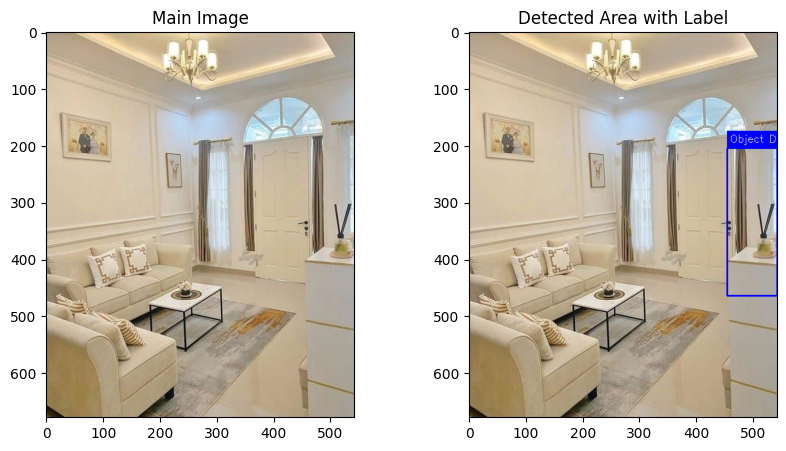

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk memeriksa apakah template lebih kecil dari gambar utama
def validate_template_size(main_image, template):
    if template.shape[0] > main_image.shape[0] or template.shape[1] > main_image.shape[1]:
        raise ValueError("Template size must be smaller than the main image size!")

try:
    # Unggah gambar utama
    print("Upload main image:")
    main_image_file = files.upload()
    main_image_filename = list(main_image_file.keys())[0]

    # Unggah template
    print("Upload template image:")
    template_file = files.upload()
    template_filename = list(template_file.keys())[0]

    # Load gambar utama dan template
    main_image = cv2.imread(main_image_filename)  # Gambar berwarna
    template = cv2.imread(template_filename, cv2.IMREAD_GRAYSCALE)  # Template tetap grayscale

    # Validasi ukuran template
    validate_template_size(main_image, template)

    # Konversi gambar utama ke grayscale untuk template matching
    main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

    # Lakukan Template Matching
    result = cv2.matchTemplate(main_image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Gambar kotak di sekitar area yang terdeteksi
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Salin gambar untuk output dan tambahkan kotak dan label
    output = main_image.copy()
    cv2.rectangle(output, top_left, bottom_right, (255, 0, 0), 2)  # Kotak biru
    # Tambahkan kotak label di atas kotak deteksi
    label_top_left = (top_left[0], top_left[1] - 30)
    label_bottom_right = (top_left[0] + 120, top_left[1])
    cv2.rectangle(output, label_top_left, label_bottom_right, (255, 0, 0), -1)  # Kotak biru solid untuk label
    cv2.putText(output, "Object Detected", (top_left[0] + 5, top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)  # Teks putih di atas kotak label

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), plt.title("Main Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Area with Label")
    plt.show()

except ValueError as ve:
    print("Error:", ve)
except Exception as e:
    print("An unexpected error occurred:", e)


Hasil Analisis Output:

Pada output hasil template matching, gambar utama menunjukkan keseluruhan objek di dalam ruangan, sedangkan gambar deteksi menyoroti area yang sesuai dengan template. Deteksi ini dilakukan menggunakan metode Template Matching dengan algoritma cv2.TM_CCOEFF_NORMED, yang menentukan kecocokan berdasarkan nilai korelasi maksimum. Area yang berhasil terdeteksi diberi kotak biru untuk menandai lokasi objek sesuai template, dengan label "Object Detected" di atasnya sebagai indikasi visual. Hasil deteksi ini menunjukkan tingkat presisi yang tinggi dalam mencocokkan template dengan gambar utama, di mana posisi dan ukuran area terdeteksi sesuai dengan perbandingan grayscale antara keduanya. Pendekatan ini berpotensi digunakan dalam aplikasi seperti deteksi objek otomatis maupun klasifikasi gambar.

# **Praktikum 3: Pembuatan Pyramid Gambar**

Tujuan: Memahami cara membuat Gaussian Pyramid untuk memproses gambar pada berbagai skala.

Saving GAMBAR 3.jpg to GAMBAR 3.jpg


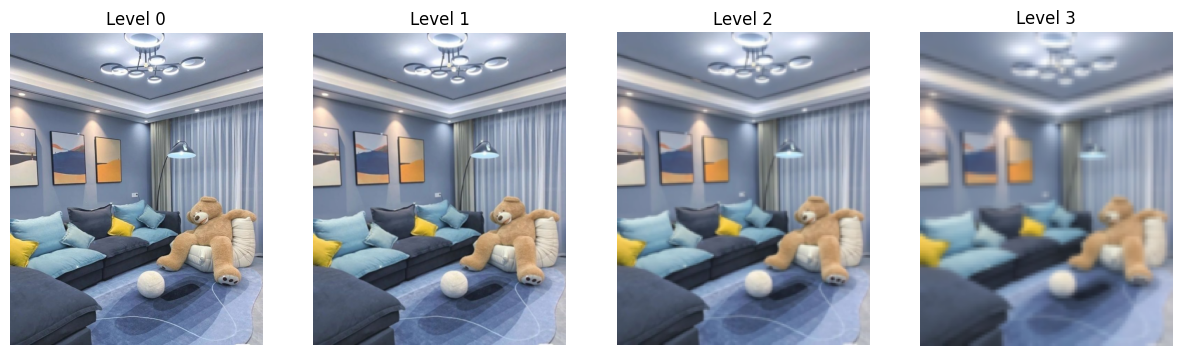

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)

# Buat Gaussian Pyramid
pyramid = [image]
for i in range(3):  # Buat 3 level pyramid
    image = cv2.pyrDown(image)
    pyramid.append(image)

# Tampilkan setiap level
plt.figure(figsize=(15, 5))
for level, img in enumerate(pyramid):
    plt.subplot(1, len(pyramid), level + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Level {level}')
    plt.axis('off')

plt.show()

Hasil Analisis Output:

Pada output Gaussian Pyramid, setiap level menunjukkan gambar dengan resolusi yang semakin rendah akibat proses downsampling. Gambar di Level 0 merepresentasikan resolusi asli, sementara Level 1, Level 2, dan Level 3 merupakan hasil penurunan resolusi secara bertahap menggunakan fungsi cv2.pyrDown. Proses ini menyebabkan hilangnya detail visual, terutama pada elemen kecil atau tekstur halus, karena piksel-piksel bertetangga digabungkan untuk membentuk representasi gambar berukuran lebih kecil. Pendekatan ini sangat bermanfaat dalam aplikasi seperti analisis multi-resolusi, deteksi fitur pada berbagai skala, serta penghematan sumber daya komputasi dalam pemrosesan gambar. Gaussian Pyramid menyediakan metode hierarkis yang efisien untuk mengolah gambar tanpa menghilangkan struktur utama dari konten visual.

# **Praktikum 4: Deteksi Lingkaran Menggunakan Hough Transform**

Tujuan: Memahami cara mendeteksi lingkaran di dalam gambar menggunakan metode Hough Transform.

Saving GAMBAR 4.jpg to GAMBAR 4 (8).jpg


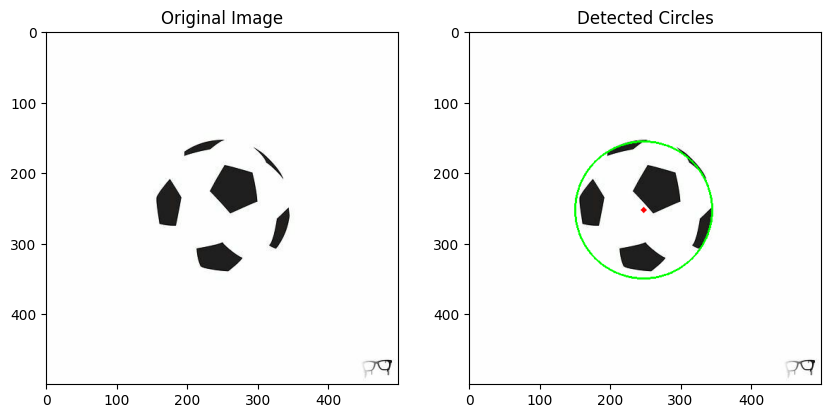

In [13]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi lingkaran menggunakan Hough Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,  # Pastikan jarak antar lingkaran lebih besar
    param1=100,  # Threshold untuk Canny edge detection
    param2=50,   # Sensitivitas deteksi (naikkan jika terlalu banyak deteksi)
    minRadius=50,  # Ukuran radius minimal bola
    maxRadius=150  # Ukuran radius maksimal bola
)

# Gambar lingkaran yang terdeteksi pada gambar asli
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Koordinat pusat lingkaran
        radius = circle[2]  # Radius lingkaran
        cv2.circle(output, center, radius, (0, 255, 0), 2)  # Gambar lingkaran
        cv2.circle(output, center, 2, (0, 0, 255), 3)  # Gambar pusat lingkaran

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Circles")
plt.show()

Hasil Analisis Output:

Pada hasil deteksi lingkaran menggunakan metode Hough Transform, gambar asli ditampilkan di sisi kiri, sedangkan gambar dengan lingkaran yang terdeteksi berada di sisi kanan. Algoritma ini berhasil mengidentifikasi lingkaran dengan menggambarkan tepi lingkaran menggunakan garis hijau dan menandai pusatnya dengan titik merah. Deteksi dilakukan dengan mengatur parameter seperti sensitivitas, jarak antar lingkaran, serta radius minimum dan maksimum untuk memastikan hasil yang akurat sesuai karakteristik lingkaran dalam gambar. Teknik ini sangat efektif untuk berbagai aplikasi, termasuk pengolahan citra medis, pengenalan objek, dan analisis geometris. Hasil deteksi menunjukkan bahwa algoritma mampu mendeteksi lingkaran utama dengan tingkat presisi yang baik.

# **Praktikum 5: Ekstraksi Warna Dominan pada Gambar**

Tujuan: Memahami cara mengekstraksi warna dominan dari sebuah gambar menggunakan K-Means Clustering.

Saving GAMBAR 5.jpg to GAMBAR 5.jpg


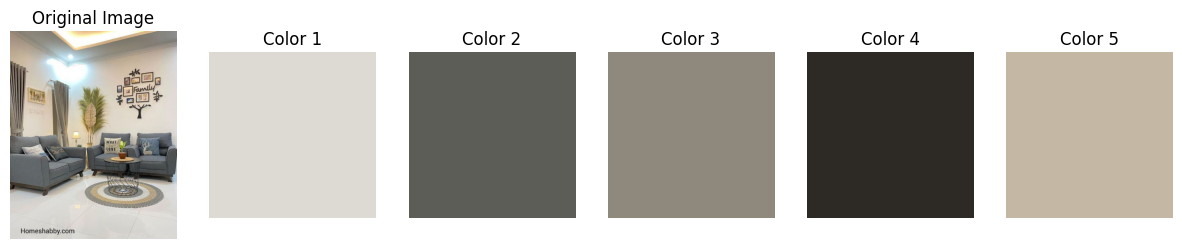

In [14]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke format RGB
reshaped_image = image.reshape((-1, 3))  # Ubah menjadi array 2D (pixel x warna)

# K-Means Clustering untuk menemukan warna dominan
k = 5  # Jumlah cluster warna
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reshaped_image)

# Ekstrak warna dominan
dominant_colors = kmeans.cluster_centers_
dominant_colors = np.uint8(dominant_colors)

# Tampilkan gambar asli
plt.figure(figsize=(15, 5))

plt.subplot(1, k + 1, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")

# Tampilkan warna dominan
for i, color in enumerate(dominant_colors):
    plt.subplot(1, k + 1, i + 2)
    plt.imshow([[color / 255]])  # Normalisasi ke rentang 0-1 untuk plt
    plt.axis('off')
    plt.title(f"Color {i+1}")

plt.show()

Hasil Analisis Output:

Pada hasil analisis warna, gambar asli ditampilkan di sisi kiri, sementara lima warna dominan hasil ekstraksi menggunakan algoritma K-Means Clustering dengan lima cluster terlihat di sebelah kanan. Warna-warna dominan ini merepresentasikan kelompok piksel dengan karakteristik warna serupa, memberikan gambaran palet warna utama dalam gambar. Pendekatan ini sangat berguna untuk berbagai aplikasi, seperti analisis estetika visual, perancangan interior, atau pembuatan palet warna otomatis dalam desain grafis. Warna-warna yang dihasilkan mencerminkan suasana keseluruhan dalam gambar, seperti kombinasi warna abu-abu, biru, dan netral yang menciptakan kesan modern dan menenangkan. Teknik ini menunjukkan efisiensi algoritma K-Means dalam ekstraksi warna secara cepat dan akurat.

# **Praktikum 6: Deteksi Kontur pada Gambar**

Tujuan: Memahami cara mendeteksi dan menggambar kontur objek pada gambar menggunakan OpenCV.

Saving GAMBAR 6.jpg to GAMBAR 6.jpg


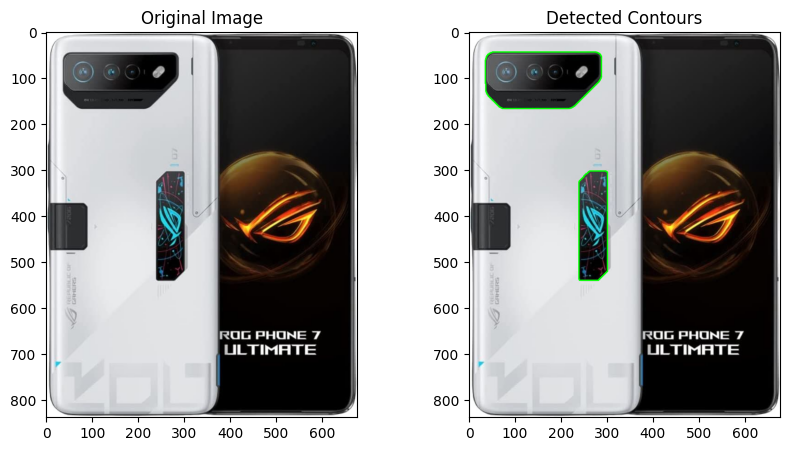

In [15]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Unggah gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive Threshold untuk pencahayaan tidak merata
threshold = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(threshold, 50, 150)

# Temukan kontur
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter kontur besar berdasarkan area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Fokus pada objek besar

# Periksa apakah kontur ditemukan
if len(filtered_contours) > 0:
    # Gambar kontur pada gambar asli
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Contours")
    plt.show()
else:
    print("No contours detected. Try adjusting the threshold or area filter parameters.")

Hasil Analisis Output:

Pada hasil analisis kontur, gambar asli berada di sisi kiri, sementara gambar dengan kontur yang terdeteksi ditampilkan di sisi kanan. Proses dimulai dengan pengurangan noise menggunakan Gaussian Blur, diikuti penerapan Adaptive Threshold untuk mengatasi variasi pencahayaan, dan deteksi tepi menggunakan algoritma Canny. Kontur yang ditemukan difilter berdasarkan area untuk memastikan hanya objek-objek besar yang diperhatikan. Kontur utama, seperti tepi perangkat, berhasil diidentifikasi dan ditandai dengan garis hijau pada gambar hasil. Pendekatan ini sangat bermanfaat dalam aplikasi seperti deteksi objek, segmentasi gambar, dan analisis bentuk. Hasil ini menunjukkan efektivitas metode dalam menangkap detail struktural yang penting dari objek di dalam gambar.